In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import logistic
from scipy.stats import f

---
---
---
TASK1 (Сравнение двух дисперсий нормальных генеральных совокупностей
)

In [20]:
loc1, scale1, size1 = 10, 2, 100
logistic_sample1 = logistic.rvs(loc=loc1, scale=scale1, size=size1)

loc2, scale2, size2 = 15, 4, 150
logistic_sample2 = logistic.rvs(loc=loc2, scale=scale2, size=size2)

logistic_var1 = np.var(logistic_sample1, ddof=1)
logistic_var2 = np.var(logistic_sample2, ddof=1)


# Расчёт F-статистики и определение степеней свободы
F_statistic_logistic = logistic_var2 / logistic_var1

k1 = size2 - 1 
k2 = size1 - 1  

# Расчёт p-значения для F-теста
p_value_logistic = 1 - f.cdf(F_statistic_logistic, k1, k2)

# Вывод результатов
print("F-статистика:", F_statistic_logistic)
print("F-критическое:", 1.3) # взял примерно
print("P-значение:", p_value_logistic)
print("Выборочная дисперсия выборки 1:", logistic_var1)
print("Выборочная дисперсия выборки 2:", logistic_var2)


F-статистика: 4.3830391810989555
F-критическое: 1.3
P-значение: 7.560618797697316e-14
Выборочная дисперсия выборки 1: 10.921827503795306
Выборочная дисперсия выборки 2: 47.870797878339026


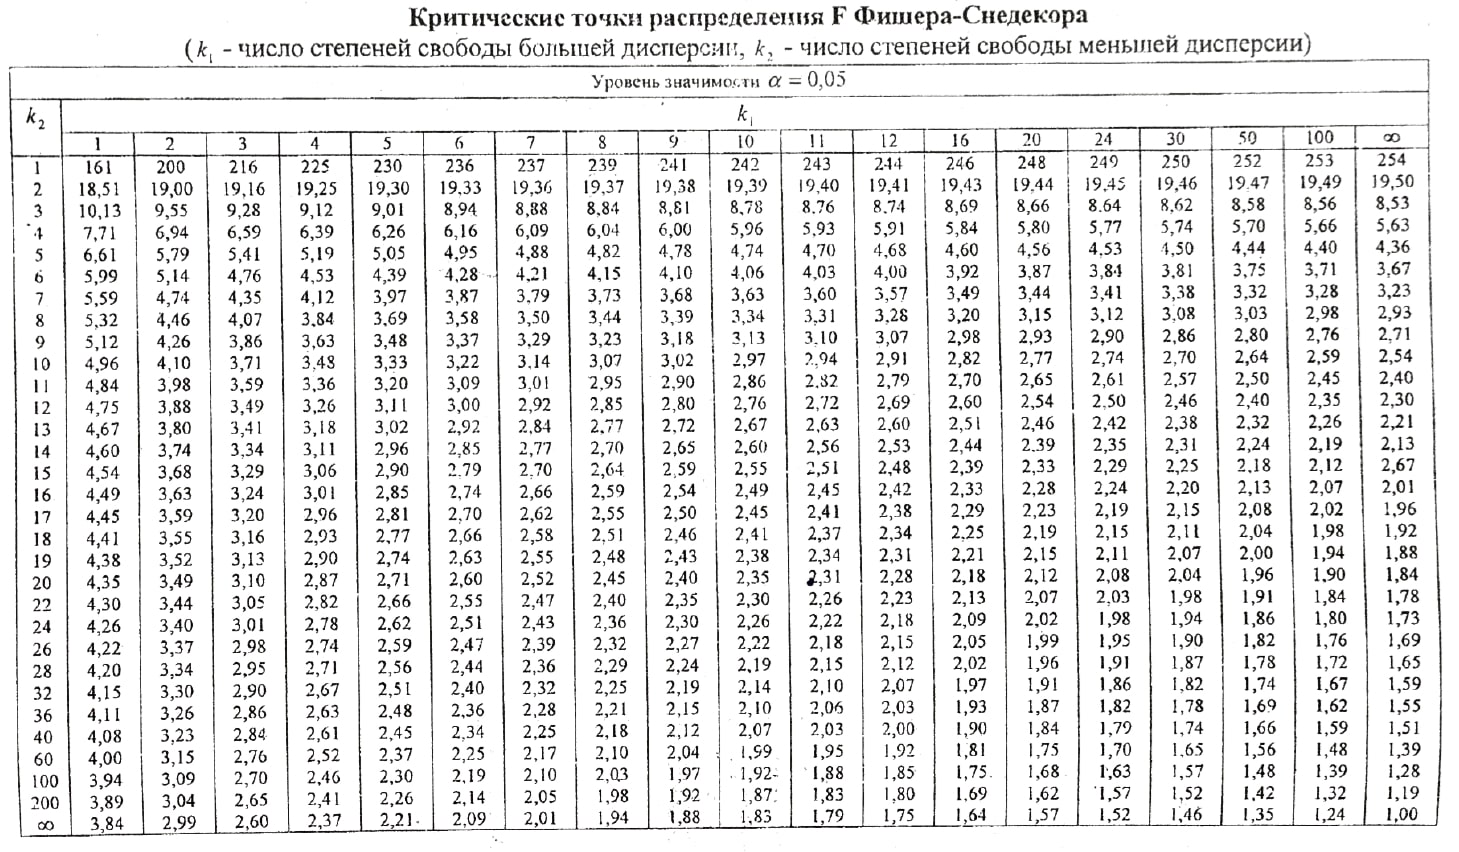

Эти результаты подтверждают, что дисперсии двух логистических выборок статистически значимо различаются. Таким образом, нулевая гипотеза о равенстве дисперсий отвергается на уровне значимости 0.05, как по Правилу 1, так и по Правилу 2.

---
---
---
TASK2 (Сравнение двух средних генеральных совокупностей, дисперсии
которых известны (большие выборки)
)

In [26]:
from scipy.stats import norm, zscore

mu1, sigma1, n1 = 50, 5, 100
sample1 = logistic.rvs(loc=mu1, scale=sigma1, size=n1)

mu2, sigma2, n2 = 53, 6, 150
sample2 = logistic.rvs(loc=mu2, scale=sigma2, size=n2)

mean1 = np.mean(sample1)
mean2 = np.mean(sample2)

std_error = np.sqrt(sigma1**2/n1 + sigma2**2/n2)
z_statistic = (mean1 - mean2) / std_error

# Расчет p-значения (двусторонний тест)
#p_value = 2 * (1 - norm.cdf(np.abs(z_statistic)))

rule1_z = 1.96
rule2_z = 1.65


print("Среднее 1 выборки:", mean1)
print("Среднее 2 выборки:", mean2)
print("Z-набл: ", z_statistic)
print("Z-кр, правило 1: ", rule1_z)
print("Z-кр, правило 2: ", rule2_z)


# Расчет доверительного интервала для разности средних
#z_critical = norm.ppf(0.975)  # 95% confidence
#margin_of_error = z_critical * std_error
#confidence_interval = (mean1 - mean2 - margin_of_error, mean1 - mean2 + margin_of_error)
#mean1, mean2, z_statistic, p_value, confidence_interval


Среднее 1 выборки: 49.947802611383615
Среднее 2 выборки: 52.039736113586116
Z-набл:  -2.9884764317178587
Z-кр, правило 1:  1.96
Z-кр, правило 2:  1.65


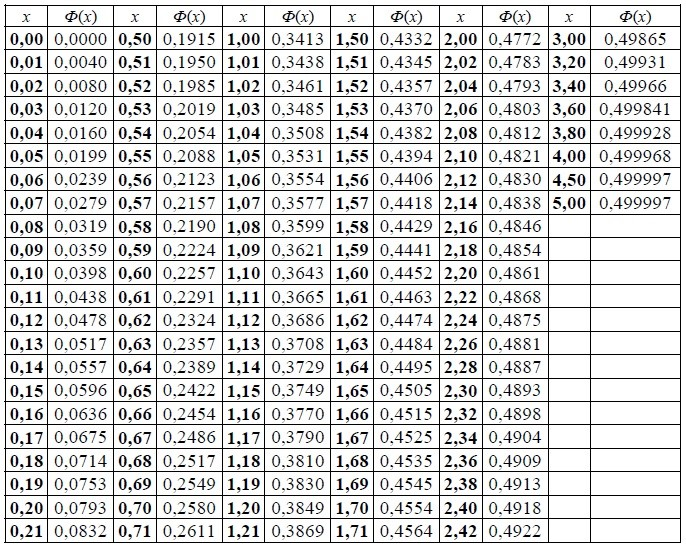

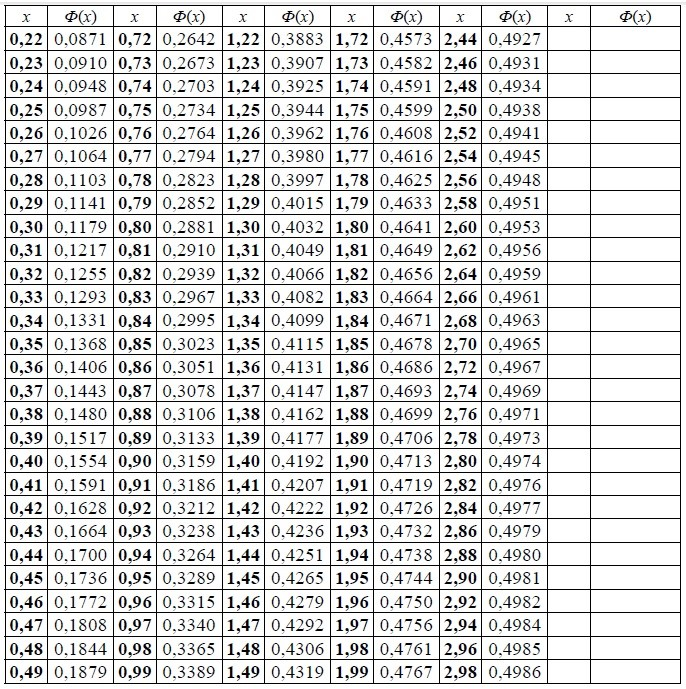

---
---
---
TASK3 (Сравнение нескольких дисперсий нормальных генеральных
совокупностей по выборкам различного объема. Критерий Бартлетта)

In [51]:
from scipy.stats import norm, bartlett

# Заданные параметры
means = [10, 20, 30, 40, 50]  # разные средние значения для каждой выборки
sigma = 5  # одинаковое стандартное отклонение
sizes = [50, 60, 70, 80, 90]  # объемы выборок

# Генерация пяти выборок

#РАСПРЕДЕЛЕНИЕ НОРМАЛЬНОЕ ИЛИ ПО ВАРИАНТУ?
samples = [norm.rvs(loc=mu, scale=sigma, size=n) for mu, n in zip(means, sizes)]
vars = [np.var(sample) for sample in samples]


print(vars)

# Применение критерия Бартлетта для проверки равенства дисперсий
bartlett_stat, p_value = bartlett(*samples)

#l - число выборок
chi_crit = 9.5

bartlett_stat, p_value


[22.923382654438445, 19.519186154654616, 21.820462518754873, 28.109222094660435, 18.378176365525324]


(4.357644888658439, 0.3597623455993077)

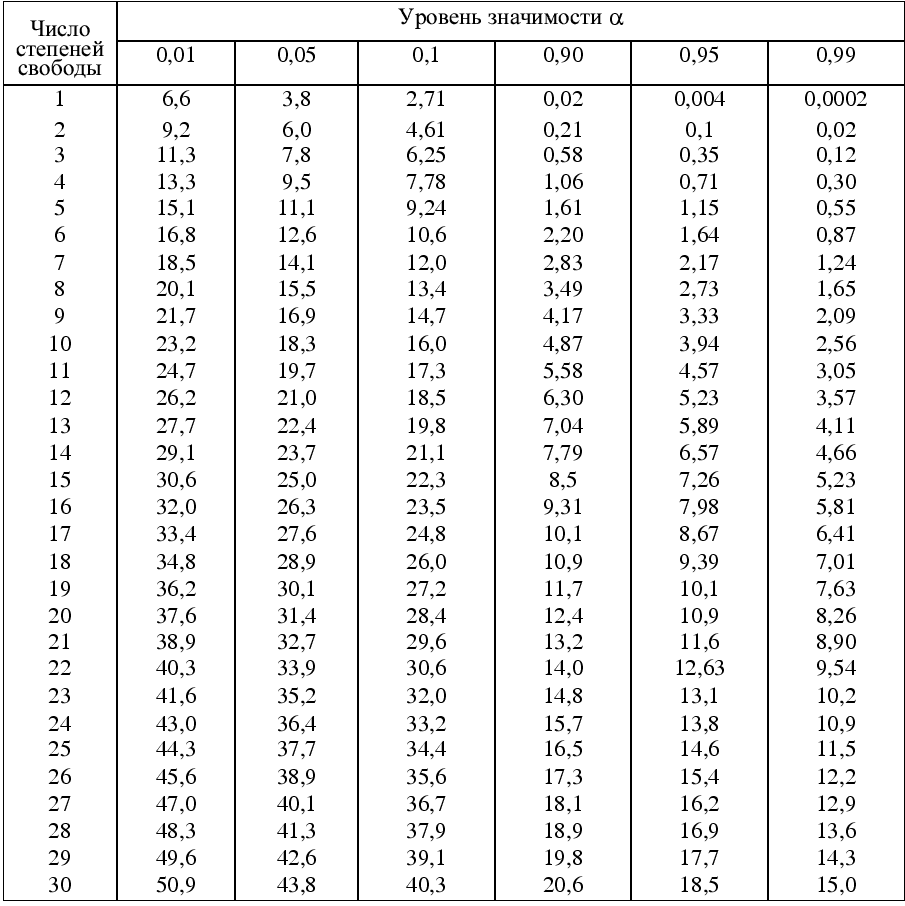